In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
def velocity_of_projectile_motion(range, angle):
    return ((range*9.81)/math.sin(2*math.radians(angle)))**0.5

In [3]:
vels = []

for x in range(1, 46):
    for alpha in range(1,90):
        v = velocity_of_projectile_motion(x, alpha)
        vels.append(v)

mean = np.mean(vels)
max = np.max(vels)
min = np.min(vels)

print(mean, max, min)


21.515681484912935 112.4685713884357 3.132091952673165


C:\Users\peter\AppData\Local\Temp\ipykernel_11156\2705101655.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(vels, shade=True, color="blue")


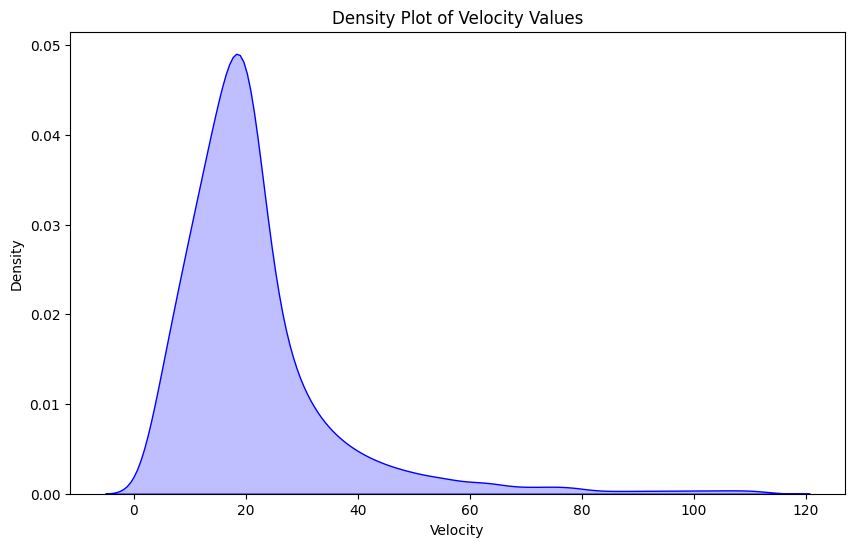

In [4]:
plt.figure(figsize=(10, 6))
sns.kdeplot(vels, shade=True, color="blue")
plt.title('Density Plot of Velocity Values')
plt.xlabel('Velocity')
plt.ylabel('Density')
plt.show()

In [5]:
slow = []
normal = []
fast = []
ultra = []

for x in range(1, 46):
    for alpha in range(1,90):
        v = velocity_of_projectile_motion(x, alpha)
        vels.append(v)
        if v < 9:
            slow.append([x,alpha])
        if v > 8 and v < 21:
            normal.append([x, alpha])
        if v >21 and v < 41:
            fast.append([x, alpha])
        if v > 40:
            ultra.append([x, alpha])

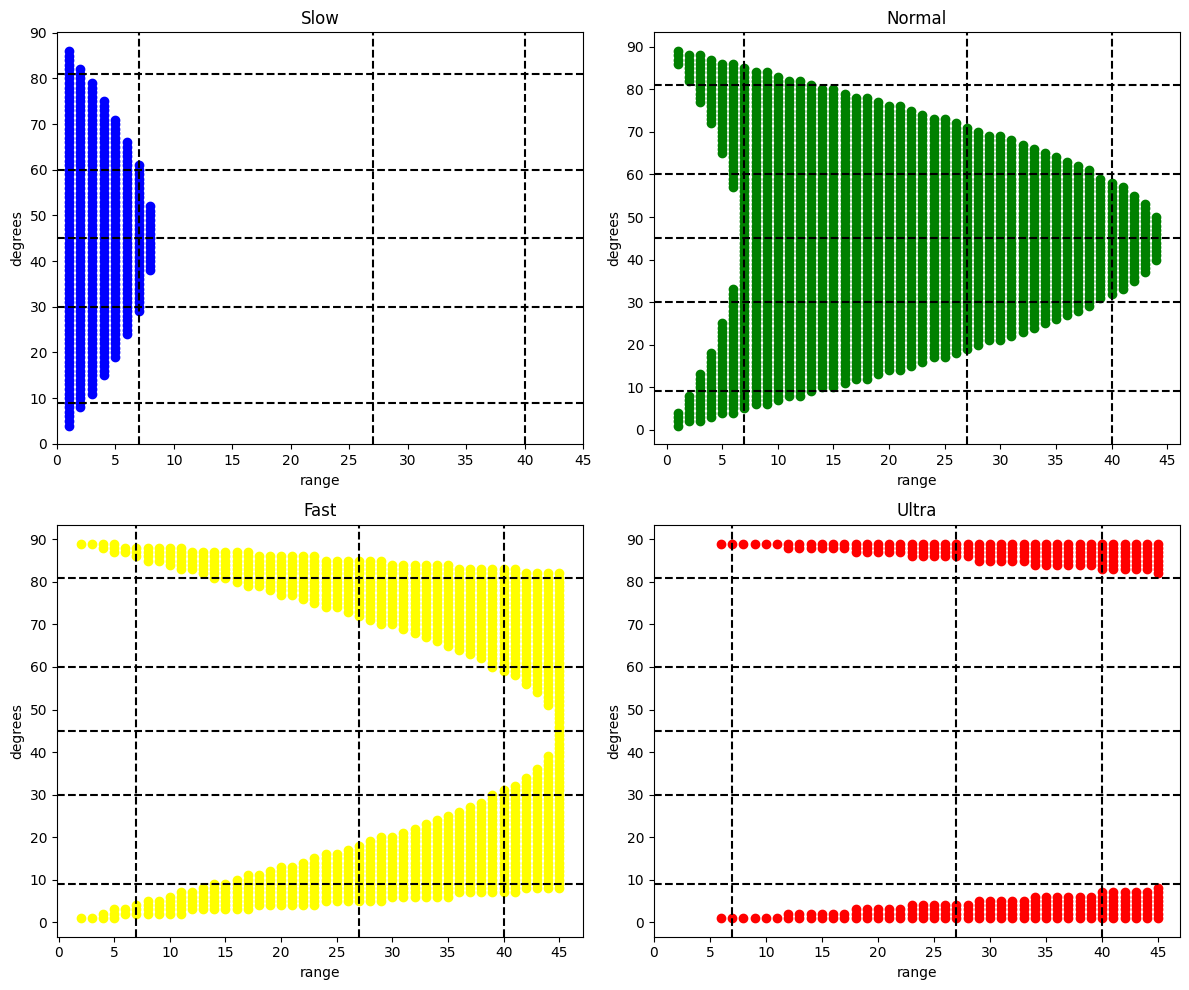

In [6]:

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

vertical_lines = [7, 40, 27]
horizontal_lines = [9, 45, 81, 30, 60]

axs[0, 0].scatter(*zip(*slow), color='blue')
axs[0, 0].set_title('Slow')
axs[0, 0].set_xlabel('range')
axs[0, 0].set_ylabel('degrees')
axs[0, 0].set_xticks(range(0, 50, 5))
axs[0, 0].set_yticks(range(0, 100, 10))
for x in vertical_lines:
    axs[0, 0].axvline(x, color='black', linestyle='--')
for y in horizontal_lines:
    axs[0, 0].axhline(y, color='black', linestyle='--')

axs[0, 1].scatter(*zip(*normal), color='green')
axs[0, 1].set_title('Normal')
axs[0, 1].set_xlabel('range')
axs[0, 1].set_ylabel('degrees')
axs[0, 1].set_xticks(range(0, 50, 5))
axs[0, 1].set_yticks(range(0, 100, 10))
for x in vertical_lines:
    axs[0, 1].axvline(x, color='black', linestyle='--')
for y in horizontal_lines:
    axs[0, 1].axhline(y, color='black', linestyle='--')


axs[1, 0].scatter(*zip(*fast), color='yellow')
axs[1, 0].set_title('Fast')
axs[1, 0].set_xlabel('range')
axs[1, 0].set_ylabel('degrees')
axs[1, 0].set_xticks(range(0, 50, 5))
axs[1, 0].set_yticks(range(0, 100, 10))
for x in vertical_lines:
    axs[1, 0].axvline(x, color='black', linestyle='--')
for y in horizontal_lines:
    axs[1, 0].axhline(y, color='black', linestyle='--')


axs[1, 1].scatter(*zip(*ultra), color='red')
axs[1, 1].set_title('Ultra')
axs[1, 1].set_xlabel('range')
axs[1, 1].set_ylabel('degrees')
axs[1, 1].set_xticks(range(0, 50, 5))
axs[1, 1].set_yticks(range(0, 100, 10))
for x in vertical_lines:
    axs[1, 1].axvline(x, color='black', linestyle='--')
for y in horizontal_lines:
    axs[1, 1].axhline(y, color='black', linestyle='--')

plt.tight_layout()
plt.show()


In [7]:
x_range = np.arange(0, 46, 1)
x_angle = np.arange(0, 90, 1)
x_weight  = np.arange(0, 7, 1)
x_velocity = np.arange(0,110,1)

In [8]:
range_close = fuzz.trimf(x_range, [0, 0, 9])
range_normal = fuzz.trimf(x_range, [5, 18, 31])
range_far = fuzz.trimf(x_range, [25, 34, 43])
range_miles_away = fuzz.trimf(x_range, [38, 45,45])

In [9]:
angle_almost_horizontal = fuzz.trimf(x_angle, [0, 0, 10])
angle_low = fuzz.trimf(x_angle, [9, 27, 44])
angle_mid = fuzz.trimf(x_angle, [30, 45, 60])
angle_high = fuzz.trimf(x_angle, [46, 63, 81])
angle_almost_vertical = fuzz.trimf(x_angle, [80, 90, 90])

In [10]:
weight_low = fuzz.trimf(x_weight, [0, 0, 2])
weight_mid = fuzz.trimf(x_weight, [1, 3, 4])
weight_high = fuzz.trimf(x_weight, [3, 6, 6])

In [11]:
velocity_low = fuzz.trimf(x_velocity, [0, 0, 8])
velocity_mid = fuzz.trimf(x_velocity, [6, 15, 24])
velocity_high = fuzz.trimf(x_velocity, [18, 31, 44])
velocity_ultra = fuzz.trimf(x_velocity, [38, 110, 110])

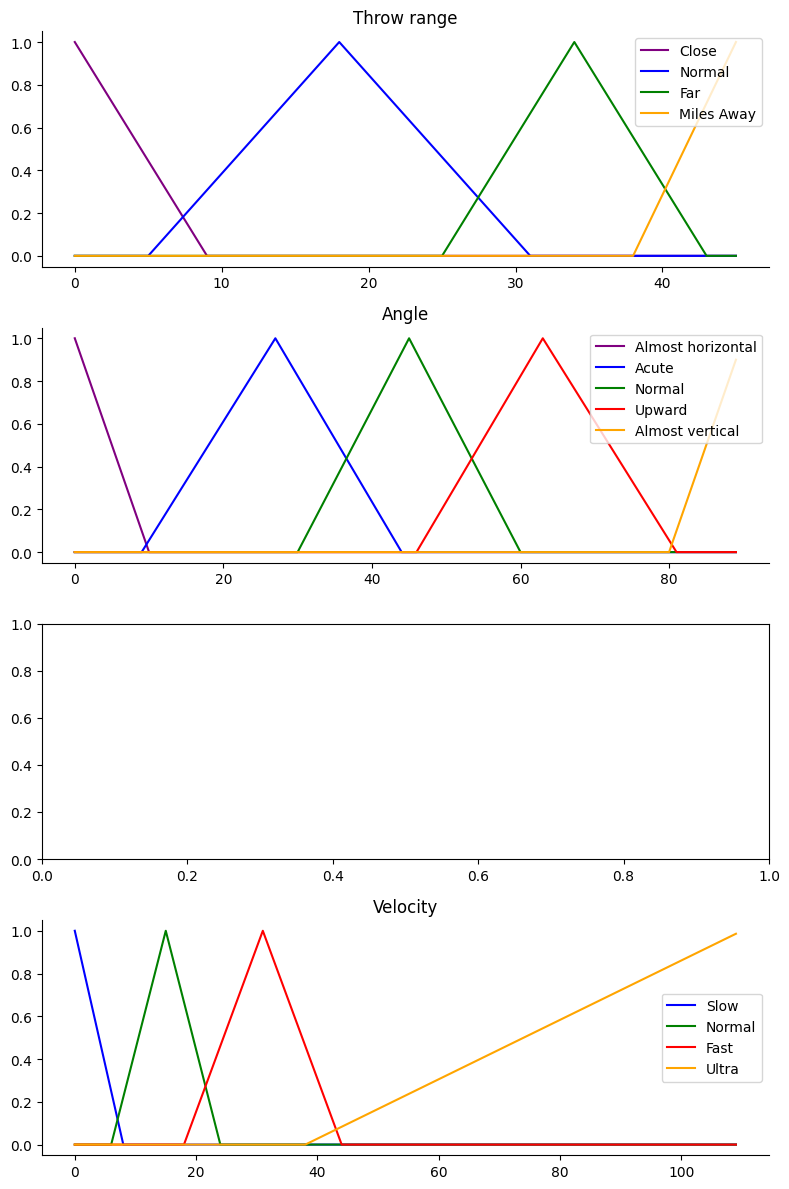

In [12]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, figsize=(8, 12))

ax0.plot(x_range, range_close, 'purple', linewidth=1.5, label='Close')
ax0.plot(x_range, range_normal, 'b', linewidth=1.5, label='Normal')
ax0.plot(x_range, range_far, 'g', linewidth=1.5, label='Far')
ax0.plot(x_range, range_miles_away, 'orange', linewidth = 1.5, label = 'Miles Away')
ax0.set_title('Throw range')
ax0.legend()

ax1.plot(x_angle, angle_almost_horizontal, 'purple', linewidth=1.5, label='Almost horizontal')
ax1.plot(x_angle, angle_low, 'b', linewidth=1.5, label='Acute')
ax1.plot(x_angle, angle_mid, 'g', linewidth=1.5, label='Normal')
ax1.plot(x_angle, angle_high, 'r', linewidth=1.5, label='Upward')
ax1.plot(x_angle, angle_almost_vertical, 'orange', linewidth=1.5, label='Almost vertical')
ax1.set_title('Angle')
ax1.legend()

# ax2.plot(x_weight, weight_low, 'b', linewidth=1.5, label='Light')
# ax2.plot(x_weight, weight_mid, 'g', linewidth=1.5, label='Medium')
# ax2.plot(x_weight, weight_high, 'r', linewidth=1.5, label='Hard to throw')
# ax2.set_title('Weight')
# ax2.legend()

ax3.plot(x_velocity, velocity_low, 'b', linewidth=1.5, label='Slow')
ax3.plot(x_velocity, velocity_mid, 'g', linewidth=1.5, label='Normal')
ax3.plot(x_velocity, velocity_high, 'r', linewidth=1.5, label='Fast')
ax3.plot(x_velocity, velocity_ultra, 'orange', linewidth=1.5, label='Ultra')
ax3.set_title('Velocity')
ax3.legend()

for ax in (ax0, ax1,  ax3):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

In [13]:
differences = np.zeros((450, 899))
s = 0
errors = []

for k in range(1, 451):
    for n in range(80, 820):

        i = k/10
        j = n/10

        range_level_close= fuzz.interp_membership(x_range, range_close, i)
        range_level_normal = fuzz.interp_membership(x_range, range_normal, i)
        range_level_far = fuzz.interp_membership(x_range, range_far, i)
        range_level_miles_away = fuzz.interp_membership(x_range, range_miles_away, i)

        angle_level_horizontal = fuzz.interp_membership(x_angle, angle_almost_horizontal, j)
        angle_level_acute = fuzz.interp_membership(x_angle, angle_low, j)
        angle_level_normal = fuzz.interp_membership(x_angle, angle_mid, j)
        angle_level_upward = fuzz.interp_membership(x_angle, angle_high, j)
        angle_level_vertical = fuzz.interp_membership(x_angle, angle_almost_vertical, j)

        horizontal_close = np.fmin(angle_level_horizontal, range_level_close) ##
        horizontal_normal = np.fmin(angle_level_horizontal, range_level_normal) ##
        horizontal_far = np.fmin(angle_level_horizontal, range_level_far) ##
        horizontal_miles_away = np.fmin(angle_level_horizontal, range_level_miles_away) ##

        acute_close = np.fmin(angle_level_acute, range_level_close) ##
        acute_normal = np.fmin(angle_level_acute, range_level_normal)##
        acute_far = np.fmin(angle_level_acute, range_level_far)##
        acute_miles_away = np.fmin(angle_level_acute, range_level_miles_away) ##


        normal_close = np.fmin(angle_level_normal, range_level_close) ##
        normal_normal = np.fmin(angle_level_normal, range_level_normal) ##
        normal_far = np.fmin(angle_level_normal, range_level_far) ##
        normal_miles_away = np.fmin(angle_level_normal, range_level_miles_away) ##


        upward_close = np.fmin(angle_level_upward, range_level_close) ##
        upward_normal = np.fmin(angle_level_upward, range_level_normal) ##
        upward_far = np.fmin(angle_level_upward, range_level_far) ##
        upward_miles_away = np.fmin(angle_level_upward, range_level_miles_away) ##

        vertical_close = np.fmin(angle_level_vertical, range_level_close) ##
        vertical_normal = np.fmin(angle_level_vertical, range_level_normal) ##
        vertical_far = np.fmin(angle_level_vertical, range_level_far) ##
        vertical_miles_away = np.fmin(angle_level_vertical, range_level_miles_away) ##

      
        active_rule0 = np.fmax(
            np.fmax(vertical_close, upward_close),
            np.fmax(normal_close,  
                    np.fmax(acute_close, horizontal_close))
        ) 
        velocity_activation0 = np.fmin(active_rule0, velocity_low) ##########

        active_rule3 = np.fmax(
            np.fmax(horizontal_normal, np.fmax(horizontal_far, horizontal_miles_away)),
            np.fmax(vertical_normal, np.fmax(vertical_far, vertical_miles_away))
        )
        velocity_activation3 = np.fmin(active_rule3, velocity_ultra)#########

        active_rule1 = np.fmax(
            np.fmax(acute_normal, upward_normal),
            np.fmax(normal_normal, normal_far)
        )
        velocity_activation1 = np.fmin(active_rule1, velocity_mid)

        active_rule2 = np.fmax(
            np.fmax(acute_far, upward_far),
            np.fmax(acute_miles_away, 
                    np.fmax(normal_miles_away, upward_miles_away))
        )
        velocity_activation2 = np.fmin(active_rule2, velocity_high)
         
      
        aggregated = np.fmax(np.fmax(velocity_activation0, velocity_activation1),
                            np.fmax(velocity_activation2, velocity_activation3))
        
   
  
        velocity_fuzz = fuzz.defuzz(x_velocity, aggregated, 'centroid')
        velocity_function = velocity_of_projectile_motion(i, j)


        differences[k-1, n-1] = abs(velocity_fuzz - velocity_function)
        s += differences[k-1, n-1]

        
mean_error = s/(450*740)
print(mean_error)

5.828530618419496


([<matplotlib.axis.YTick at 0x1d8229116d0>,
 [Text(0, 0, '0.0'),
  Text(0, 100, '10.0'),
  Text(0, 200, '20.0'),
  Text(0, 300, '30.0'),
  Text(0, 400, '40.0')])

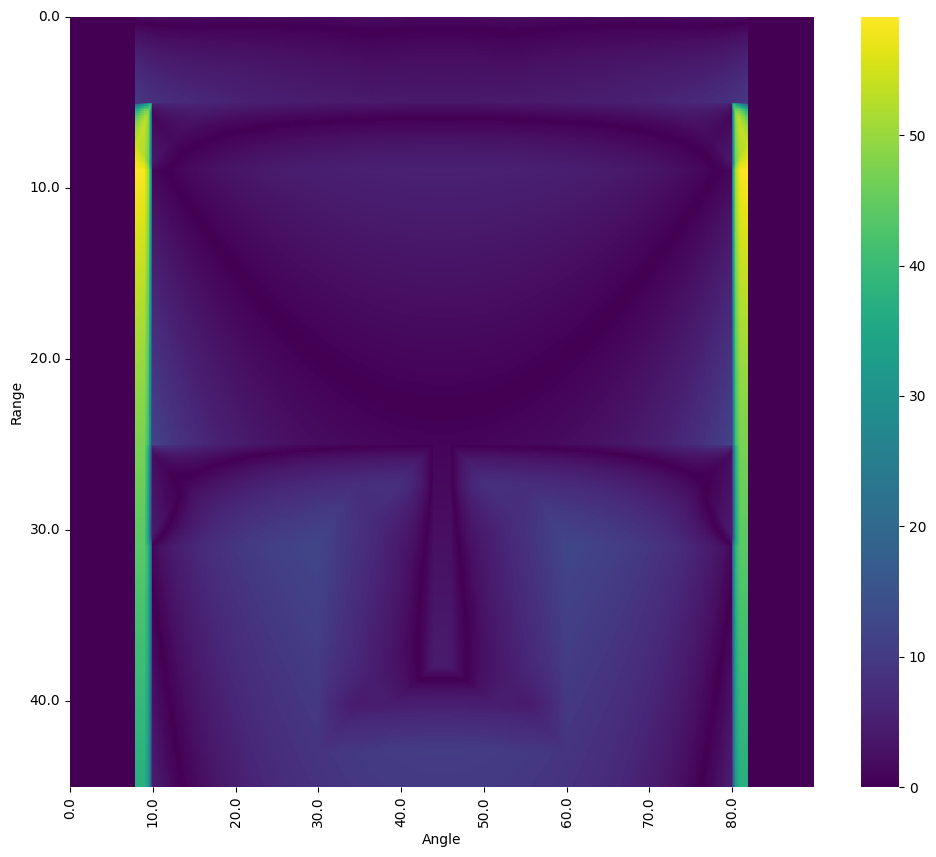

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(differences, fmt=".2f", cmap="viridis")
plt.xlabel('Angle')
plt.xticks(ticks=np.arange(0, differences.shape[1], 100), labels=np.arange(0, differences.shape[1], 100) / 10)
plt.ylabel('Range')
plt.yticks(ticks=np.arange(0, differences.shape[0], 100), labels=np.arange(0, differences.shape[0], 100) / 10)